# Input clean up

We perform the following clean up steps:
1. Download the raw data from Google and extract all possible nGrams
2. Filter out entries that contain the followig characterclass `[_.,!'0-9]`
3. Apply NFKC normalization, lowercase and deduplicate all inputs
4. Run WordNet lemmatizer and snowball stemmer
5. Prue entries with $\sum_{y} var_{0, y} < 1000$

*NOTE: Swapping 2. and 3. does **not** lead to a different output*

The following table shows the number of entries left **after** each step:

| Dataset | raw     | filtered | normalized | stems   | pruned |
|---------|---------|----------|------------|---------|--------|
| a | 1440378 | 493706 | 361035 | 276583 | 52766 |
| b | 1018343 | 377220 | 281903 | 227025 | 48380 |
| c | 1546639 | 532497 | 380823 | 288078 | 59439 |
| d | 981466 | 341819 | 249790 | 188481 | 38220 |
| e | 829512 | 288878 | 213871 | 155833 | 29578 |
| f | 742479 | 251520 | 182495 | 141276 | 27290 |
| g | 675417 | 250442 | 187863 | 152828 | 32088 |
| h | 763425 | 271203 | 199303 | 160263 | 33337 |
| i | 847619 | 268572 | 191304 | 136416 | 23698 |
| j | 276339 | 99430 | 70257 | 58083 | 11241 |
| k | 536396 | 222419 | 172642 | 150450 | 30335 |
| l | 779711 | 266197 | 194019 | 155416 | 31561 |
| m | 1231265 | 448398 | 327496 | 261578 | 56082 |
| n | 642961 | 223966 | 163531 | 128920 | 26837 |
| o | 606102 | 209806 | 156250 | 118133 | 20383 |
| p | 1464402 | 518315 | 373821 | 286958 | 57440 |
| q | 108085 | 37278 | 26777 | 21695 | 4124 |
| r | 886734 | 302916 | 223977 | 167128 | 32791 |
| s | 1834759 | 653305 | 478905 | 378824 | 77857 |
| t | 1106849 | 384978 | 275879 | 219654 | 42432 |
| u | 357527 | 130599 | 96580 | 69671 | 13725 |
| v | 451224 | 166432 | 122916 | 100387 | 19142 |
| w | 511180 | 159192 | 117519 | 96570 | 18893 |
| x | 66100 | 20082 | 12810 | 11384 | 2222 |
| y | 127204 | 43844 | 31780 | 27932 | 5548 |
| z | 138100 | 55448 | 43393 | 38363 | 7642 |
| $\sum$ | **19970216** | **7018462** | **5136939** | **4017929** | **803051** |

Afterwards the single lists are joined together. Because of some non-English unicode characters, there are some duplicate entries in the result and the total number drops from 803051 to 803042.

In [96]:
using Gadfly
using DataFrames

set_default_plot_size(25cm, 15cm)

df = vcat(
DataFrame(letter="a", raw=1440378, filtered=493706, normalized=361035, stems=276583, pruned=52766),
DataFrame(letter="b", raw=1018343, filtered=377220, normalized=281903, stems=227025, pruned=48380),
DataFrame(letter="c", raw=1546639, filtered=532497, normalized=380823, stems=288078, pruned=59439),
DataFrame(letter="d", raw=981466, filtered=341819, normalized=249790, stems=188481, pruned=38220),
DataFrame(letter="e", raw=829512, filtered=288878, normalized=213871, stems=155833, pruned=29578),
DataFrame(letter="f", raw=742479, filtered=251520, normalized=182495, stems=141276, pruned=27290),
DataFrame(letter="g", raw=675417, filtered=250442, normalized=187863, stems=152828, pruned=32088),
DataFrame(letter="h", raw=763425, filtered=271203, normalized=199303, stems=160263, pruned=33337),
DataFrame(letter="i", raw=847619, filtered=268572, normalized=191304, stems=136416, pruned=23698),
DataFrame(letter="j", raw=276339, filtered=99430, normalized=70257, stems=58083, pruned=11241),
DataFrame(letter="k", raw=536396, filtered=222419, normalized=172642, stems=150450, pruned=30335),
DataFrame(letter="l", raw=779711, filtered=266197, normalized=194019, stems=155416, pruned=31561),
DataFrame(letter="m", raw=1231265, filtered=448398, normalized=327496, stems=261578, pruned=56082),
DataFrame(letter="n", raw=642961, filtered=223966, normalized=163531, stems=128920, pruned=26837),
DataFrame(letter="o", raw=606102, filtered=209806, normalized=156250, stems=118133, pruned=20383),
DataFrame(letter="p", raw=1464402, filtered=518315, normalized=373821, stems=286958, pruned=57440),
DataFrame(letter="q", raw=108085, filtered=37278, normalized=26777, stems=21695, pruned=4124),
DataFrame(letter="r", raw=886734, filtered=302916, normalized=223977, stems=167128, pruned=32791),
DataFrame(letter="s", raw=1834759, filtered=653305, normalized=478905, stems=378824, pruned=77857),
DataFrame(letter="t", raw=1106849, filtered=384978, normalized=275879, stems=219654, pruned=42432),
DataFrame(letter="u", raw=357527, filtered=130599, normalized=96580, stems=69671, pruned=13725),
DataFrame(letter="v", raw=451224, filtered=166432, normalized=122916, stems=100387, pruned=19142),
DataFrame(letter="w", raw=511180, filtered=159192, normalized=117519, stems=96570, pruned=18893),
DataFrame(letter="x", raw=66100, filtered=20082, normalized=12810, stems=11384, pruned=2222),
DataFrame(letter="y", raw=127204, filtered=43844, normalized=31780, stems=27932, pruned=5548),
DataFrame(letter="z", raw=138100, filtered=55448, normalized=43393, stems=38363, pruned=7642),
)

,letter,raw,filtered,normalized,stems,pruned
1,a,1440378,493706,361035,276583,52766
2,b,1018343,377220,281903,227025,48380
3,c,1546639,532497,380823,288078,59439
4,d,981466,341819,249790,188481,38220
5,e,829512,288878,213871,155833,29578
6,f,742479,251520,182495,141276,27290
7,g,675417,250442,187863,152828,32088
8,h,763425,271203,199303,160263,33337
9,i,847619,268572,191304,136416,23698
10,j,276339,99430,70257,58083,11241


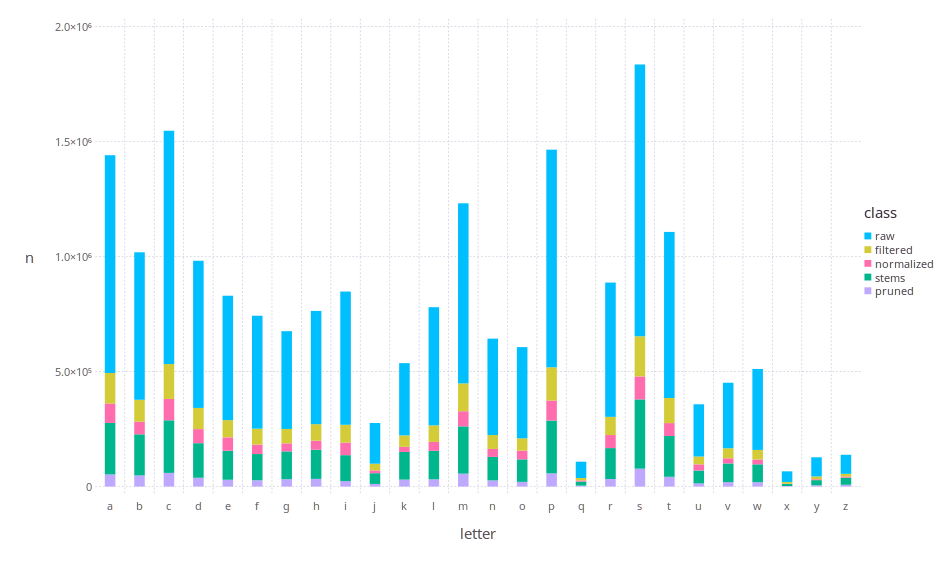

In [97]:
n = size(df)[1]
df2 = DataFrame()
for i in 1:n
    row = df[i,:]
    df2 = vcat(
    df2,
    DataFrame(letter=row[:letter], class="raw", n=(row[:raw] - row[:filtered])),
    DataFrame(letter=row[:letter], class="filtered", n=(row[:filtered] - row[:normalized])),
    DataFrame(letter=row[:letter], class="normalized", n=(row[:normalized] - row[:stems])),
    DataFrame(letter=row[:letter], class="stems", n=(row[:stems] - row[:pruned])),
    DataFrame(letter=row[:letter], class="pruned", n=row[:pruned]),
    )
end
Gadfly.plot(df2, x="letter", y="n", color="class", Geom.bar, Theme(bar_spacing=5mm), Coord.Cartesian(ymin=0, ymax=2e6))

In [102]:
df_sum = DataFrame(raw=0, filtered=0, normalized=0, stems=0, pruned=0, letter="sum")
for i in 1:n
    row = df[i,:]
    df_sum[:raw] += row[:raw]
    df_sum[:filtered] += row[:filtered]
    df_sum[:normalized] += row[:normalized]
    df_sum[:stems] += row[:stems]
    df_sum[:pruned] += row[:pruned]
end
df_sum

,raw,filtered,normalized,stems,pruned,letter
1,19970216,7018462,5136939,4017929,803051,sum


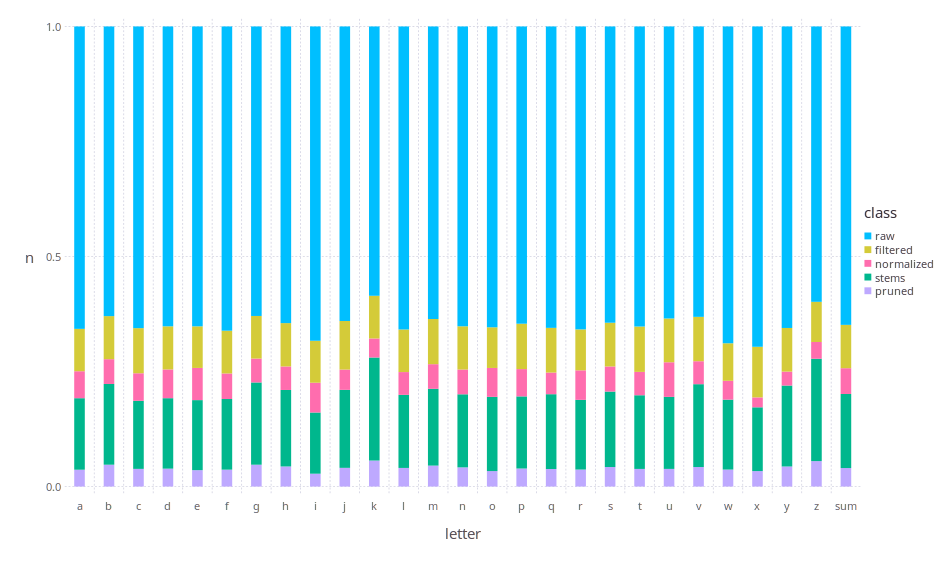

In [103]:
df3 = DataFrame()
df_including_sum = vcat(df, df_sum)
for i in 1:(n + 1)
    row = df_including_sum[i,:]
    x = row[:raw][1]
    df3 = vcat(
    df3,
    DataFrame(letter=row[:letter], class="raw", n=((row[:raw] - row[:filtered]) / x)),
    DataFrame(letter=row[:letter], class="filtered", n=((row[:filtered] - row[:normalized]) / x)),
    DataFrame(letter=row[:letter], class="normalized", n=((row[:normalized] - row[:stems]) / x)),
    DataFrame(letter=row[:letter], class="stems", n=((row[:stems] - row[:pruned]) / x)),
    DataFrame(letter=row[:letter], class="pruned", n=(row[:pruned] / x)),
    )
end
Gadfly.plot(df3, x="letter", y="n", color="class", Geom.bar, Theme(bar_spacing=5mm), Coord.Cartesian(ymin=0, ymax=1))